In [43]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle
from scipy import stats
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [44]:
data = pd.read_csv("C:/Users/lenovo/Flight Price Prediction Using ML/Dataset/Data_Train.csv")

category=['Airline','Source','Destination','Additional_Info']

In [45]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2019 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2019 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [46]:
def extract_arrival_time(row):
    pattern = re.compile(r'\d{2}-\d{2}-\d{4} \d{2}:\d{2}')
    if pattern.match(row['Arrival_Time']):
        row['Arrival_Time_Hour'] = int(row['Arrival_Time'].split(' ')[1].split(':')[0])
        row['Arrival_Time_Mins'] = int(row['Arrival_Time'].split(' ')[1].split(':')[1])
        row['Arrival_Time_Date'] = row['Arrival_Time'].split(' ')[0]
    else:
        row['Arrival_Time_Hour'] = int(row['Arrival_Time'].split(':')[0])
        row['Arrival_Time_Mins'] = int(row['Arrival_Time'].split(':')[1])
        row['Arrival_Time_Date'] = None
    return row

data = data.apply(extract_arrival_time, axis=1)

In [47]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_Time_Hour,Arrival_Time_Mins,Arrival_Time_Date
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2019 01:10,2h 50m,non-stop,No info,3897,1,10,22-03-2019
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,13,15,None
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2019 04:25,19h,2 stops,No info,13882,4,25,10-06-2019
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,23,30,None
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,21,35,None


In [48]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_Time_Hour,Arrival_Time_Mins,Arrival_Time_Date
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2019 01:10,2h 50m,non-stop,No info,3897,1,10,22-03-2019
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,13,15,None
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2019 04:25,19h,2 stops,No info,13882,4,25,10-06-2019
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,23,30,None
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,21,35,None


In [49]:
for i in category:
    print(i, data[i].unique())

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']


In [50]:
data.Date_of_Journey=data.Date_of_Journey.str.split('-')

In [51]:
data.Date_of_Journey

0        [24, 03, 2019]
1        [01, 05, 2019]
2        [09, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678    [09, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682    [09, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [52]:
data['Date']=data.Date_of_Journey.str[0]
data['Month']=data.Date_of_Journey.str[1]
data['Year']=data.Date_of_Journey.str[2]

In [53]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_Time_Hour,Arrival_Time_Mins,Arrival_Time_Date,Date,Month,Year
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR ? DEL,22:20,22-03-2019 01:10,2h 50m,non-stop,No info,3897,1,10,22-03-2019,24,03,2019
1,Air India,"[01, 05, 2019]",Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,13,15,None,01,05,2019
2,Jet Airways,"[09, 06, 2019]",Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2019 04:25,19h,2 stops,No info,13882,4,25,10-06-2019,09,06,2019
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,23,30,None,12,05,2019
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,21,35,None,01,03,2019


In [54]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [55]:
data.Route=data.Route.str.split('?')
data.Route

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10683, dtype: object

In [56]:
data['City1']=data.Route.str[0]
data['City2']=data.Route.str[1]
data['City3']=data.Route.str[2]
data['City4']=data.Route.str[3]
data['City5']=data.Route.str[4]
data['City6']=data.Route.str[5]

In [57]:
data.Dep_Time=data.Dep_Time.str.split(':')

In [58]:
data['Dep_Time_Hour']=data.Dep_Time.str[0]
data['Dep_Time_Mins']=data.Dep_Time.str[1]

In [59]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Month,Year,City1,City2,City3,City4,City5,City6,Dep_Time_Hour,Dep_Time_Mins
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[22, 20]",22-03-2019 01:10,2h 50m,non-stop,No info,...,03,2019,BLR,DEL,NaN,NaN,NaN,NaN,22,20
1,Air India,"[01, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]","[05, 50]",13:15,7h 25m,2 stops,No info,...,05,2019,CCU,IXR,BBI,BLR,NaN,NaN,05,50
2,Jet Airways,"[09, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]","[09, 25]",10-06-2019 04:25,19h,2 stops,No info,...,06,2019,DEL,LKO,BOM,COK,NaN,NaN,09,25
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]","[18, 05]",23:30,5h 25m,1 stop,No info,...,05,2019,CCU,NAG,BLR,NaN,NaN,NaN,18,05
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]","[16, 50]",21:35,4h 45m,1 stop,No info,...,03,2019,BLR,NAG,DEL,NaN,NaN,NaN,16,50


In [60]:
# create new columns for hours and minutes
data['Travel_Hours'] = data['Duration'].str.split('h').str[0]
data['Travel_Mins'] = data['Duration'].str.split('h').str[1].str.split('m').str[0]

In [61]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City1,City2,City3,City4,City5,City6,Dep_Time_Hour,Dep_Time_Mins,Travel_Hours,Travel_Mins
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[22, 20]",22-03-2019 01:10,2h 50m,non-stop,No info,...,BLR,DEL,NaN,NaN,NaN,NaN,22,20,2,50
1,Air India,"[01, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]","[05, 50]",13:15,7h 25m,2 stops,No info,...,CCU,IXR,BBI,BLR,NaN,NaN,05,50,7,25
2,Jet Airways,"[09, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]","[09, 25]",10-06-2019 04:25,19h,2 stops,No info,...,DEL,LKO,BOM,COK,NaN,NaN,09,25,19,
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]","[18, 05]",23:30,5h 25m,1 stop,No info,...,CCU,NAG,BLR,NaN,NaN,NaN,18,05,5,25
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]","[16, 50]",21:35,4h 45m,1 stop,No info,...,BLR,NAG,DEL,NaN,NaN,NaN,16,50,4,45


In [62]:
data.Total_Stops.replace('non_stop',0,inplace=True)
data.Total_Stops=data.Total_Stops.str.split(' ')
data.Total_Stops=data.Total_Stops.str[0]

In [63]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [64]:
data.Additional_Info.replace('No Info','No Info',inplace=True)

In [65]:
 data.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    1
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              1
Additional_Info          0
Price                    0
Arrival_Time_Hour        0
Arrival_Time_Mins        0
Arrival_Time_Date     6348
Date                     0
Month                    0
Year                     0
City1                    1
City2                    1
City3                 3492
City4                 9117
City5                10637
City6                10682
Dep_Time_Hour            0
Dep_Time_Mins            0
Travel_Hours             0
Travel_Mins              1
dtype: int64

In [66]:
 data.drop(['City4','City5','City6'],axis=1,inplace=True)

In [67]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Travel_Hours,Travel_Mins
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[22, 20]",22-03-2019 01:10,2h 50m,non-stop,No info,...,24,03,2019,BLR,DEL,NaN,22,20,2,50
1,Air India,"[01, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]","[05, 50]",13:15,7h 25m,2,No info,...,01,05,2019,CCU,IXR,BBI,05,50,7,25
2,Jet Airways,"[09, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]","[09, 25]",10-06-2019 04:25,19h,2,No info,...,09,06,2019,DEL,LKO,BOM,09,25,19,
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]","[18, 05]",23:30,5h 25m,1,No info,...,12,05,2019,CCU,NAG,BLR,18,05,5,25
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]","[16, 50]",21:35,4h 45m,1,No info,...,01,03,2019,BLR,NAG,DEL,16,50,4,45


In [68]:
data.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'],axis=1, inplace=True)

In [69]:
data.isnull().sum()

Airline                 0
Source                  0
Destination             0
Total_Stops             1
Additional_Info         0
Price                   0
Arrival_Time_Hour       0
Arrival_Time_Mins       0
Arrival_Time_Date    6348
Date                    0
Month                   0
Year                    0
City1                   1
City2                   1
City3                3492
Dep_Time_Hour           0
Dep_Time_Mins           0
Travel_Hours            0
Travel_Mins             1
dtype: int64

In [70]:
data['City3'].fillna('None',inplace=True)

In [71]:
#data['Arrival_Time_Date'].fillna(data['Date'],inplace=True)

In [72]:
data['Travel_Hours'].fillna(0,inplace=True)
data['Travel_Mins'].fillna(0,inplace=True)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Source             10683 non-null  object
 2   Destination        10683 non-null  object
 3   Total_Stops        10682 non-null  object
 4   Additional_Info    10683 non-null  object
 5   Price              10683 non-null  int64 
 6   Arrival_Time_Hour  10683 non-null  int64 
 7   Arrival_Time_Mins  10683 non-null  int64 
 8   Arrival_Time_Date  4335 non-null   object
 9   Date               10683 non-null  object
 10  Month              10683 non-null  object
 11  Year               10683 non-null  object
 12  City1              10682 non-null  object
 13  City2              10682 non-null  object
 14  City3              10683 non-null  object
 15  Dep_Time_Hour      10683 non-null  object
 16  Dep_Time_Mins      10683 non-null  objec

In [74]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Arrival_Time_Hour,Arrival_Time_Mins,Arrival_Time_Date,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Travel_Hours,Travel_Mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,1,10,22-03-2019,24,03,2019,BLR,DEL,None,22,20,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,13,15,None,01,05,2019,CCU,IXR,BBI,05,50,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,4,25,10-06-2019,09,06,2019,DEL,LKO,BOM,09,25,19,
3,IndiGo,Kolkata,Banglore,1,No info,6218,23,30,None,12,05,2019,CCU,NAG,BLR,18,05,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,21,35,None,01,03,2019,BLR,NAG,DEL,16,50,4,45


In [75]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Arrival_Time_Hour,Arrival_Time_Mins,Arrival_Time_Date,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Travel_Hours,Travel_Mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,1,10,22-03-2019,24,03,2019,BLR,DEL,None,22,20,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,13,15,None,01,05,2019,CCU,IXR,BBI,05,50,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,4,25,10-06-2019,09,06,2019,DEL,LKO,BOM,09,25,19,
3,IndiGo,Kolkata,Banglore,1,No info,6218,23,30,None,12,05,2019,CCU,NAG,BLR,18,05,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,21,35,None,01,03,2019,BLR,NAG,DEL,16,50,4,45


In [76]:
data.Date=data.Date.astype('int64');
data.Month=data.Month.astype('int64');
data.Year=data.Year.astype('int64');
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64');
data.Dep_Time_Mins=data.Dep_Time_Mins.astype('int64');
#data.Arrival_Time_Date=data.Arrival_Time_Date.astype('int64');
#data.Arrival_Time_Hour=data.Arrival_Time_Hour.astype('int64');
#data.Arrival_Time_Mins=data.Arrival_Time_Mins.astype('int64');
#data.Travel_Mins=data.Travel_Mins.astype('int64');

In [77]:
data[data['Travel_Hours']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Arrival_Time_Hour,Arrival_Time_Mins,Arrival_Time_Date,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Travel_Hours,Travel_Mins
6474,Air India,Mumbai,Hyderabad,2,No info,17327,16,55,None,6,3,2019,BOM,GOI,PNQ,16,50,5m,0


In [78]:
data.drop(index=6474,inplace=True,axis=0)

In [79]:
#data.Travel_Hours=data.Travel_Hours.astype('int64')

In [80]:
categorical=['Airline','Source','Destination','Additional_Info','City1']
numerical=['Total_Stops','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_Time_Date','Arrival_Time_Hour','Arrival_Time_Mins','Travel_Hours','Trvel_Mins','Total_Stops','Price']

In [81]:
 from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [82]:
data.Airline=le.fit_transform(data.Airline)
data.Source=le.fit_transform(data.Source)
data.Destination=le.fit_transform(data.Destination)
data.Additional_Info=le.fit_transform(data.Additional_Info)
data.City1=le.fit_transform(data.City1)
data.City2=le.fit_transform(data.City2)
data.City3=le.fit_transform(data.City3)
data.Total_Stops=le.fit_transform(data.Total_Stops)
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Arrival_Time_Hour,Arrival_Time_Mins,Arrival_Time_Date,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Travel_Hours,Travel_Mins
0,3,0,5,4,8,3897,1,10,22-03-2019,24,3,2019,0,13,29,22,20,2,50
1,1,3,0,1,8,7662,13,15,None,1,5,2019,2,25,1,5,50,7,25
2,4,2,1,1,8,13882,4,25,10-06-2019,9,6,2019,3,32,4,9,25,19,
3,3,3,0,0,8,6218,23,30,None,12,5,2019,2,34,3,18,5,5,25
4,3,0,5,0,8,13302,21,35,None,1,3,2019,0,34,8,16,50,4,45


In [83]:
 data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Arrival_Time_Hour,Arrival_Time_Mins,Arrival_Time_Date,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Travel_Hours,Travel_Mins
0,3,0,5,4,8,3897,1,10,22-03-2019,24,3,2019,0,13,29,22,20,2,50
1,1,3,0,1,8,7662,13,15,None,1,5,2019,2,25,1,5,50,7,25
2,4,2,1,1,8,13882,4,25,10-06-2019,9,6,2019,3,32,4,9,25,19,
3,3,3,0,0,8,6218,23,30,None,12,5,2019,2,34,3,18,5,5,25
4,3,0,5,0,8,13302,21,35,None,1,3,2019,0,34,8,16,50,4,45


In [84]:
data=data[['Airline','Source','Destination','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_Time_Date','Arrival_Time_Hour','Arrival_Time_Mins','Additional_Info','City1','Price']]

In [85]:
data.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_Time_Date,Arrival_Time_Hour,Arrival_Time_Mins,Additional_Info,City1,Price
0,3,0,5,24,3,2019,22,20,22-03-2019,1,10,8,0,3897
1,1,3,0,1,5,2019,5,50,None,13,15,8,2,7662
2,4,2,1,9,6,2019,9,25,10-06-2019,4,25,8,3,13882
3,3,3,0,12,5,2019,18,5,None,23,30,8,2,6218
4,3,0,5,1,3,2019,16,50,None,21,35,8,0,13302


In [86]:
data.describe()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_Time_Hour,Arrival_Time_Mins,Additional_Info,City1,Price
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.0,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,1.952069,1.435967,13.509081,4.708762,2019.0,12.490358,24.408819,13.348530,24.687793,7.392998,2.019753,9086.292735
std,2.352090,1.177110,1.474773,8.479363,1.164294,0.0,5.748819,18.767225,6.859398,16.504203,1.214254,1.206543,4610.885695
min,0.000000,0.000000,0.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,2.000000,0.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,8.000000,1.000000,5277.000000
50%,4.000000,2.000000,1.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,8.000000,2.000000,8372.000000
75%,4.000000,3.000000,2.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,8.000000,3.000000,12373.000000
max,11.000000,4.000000,5.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,9.000000,5.000000,79512.000000


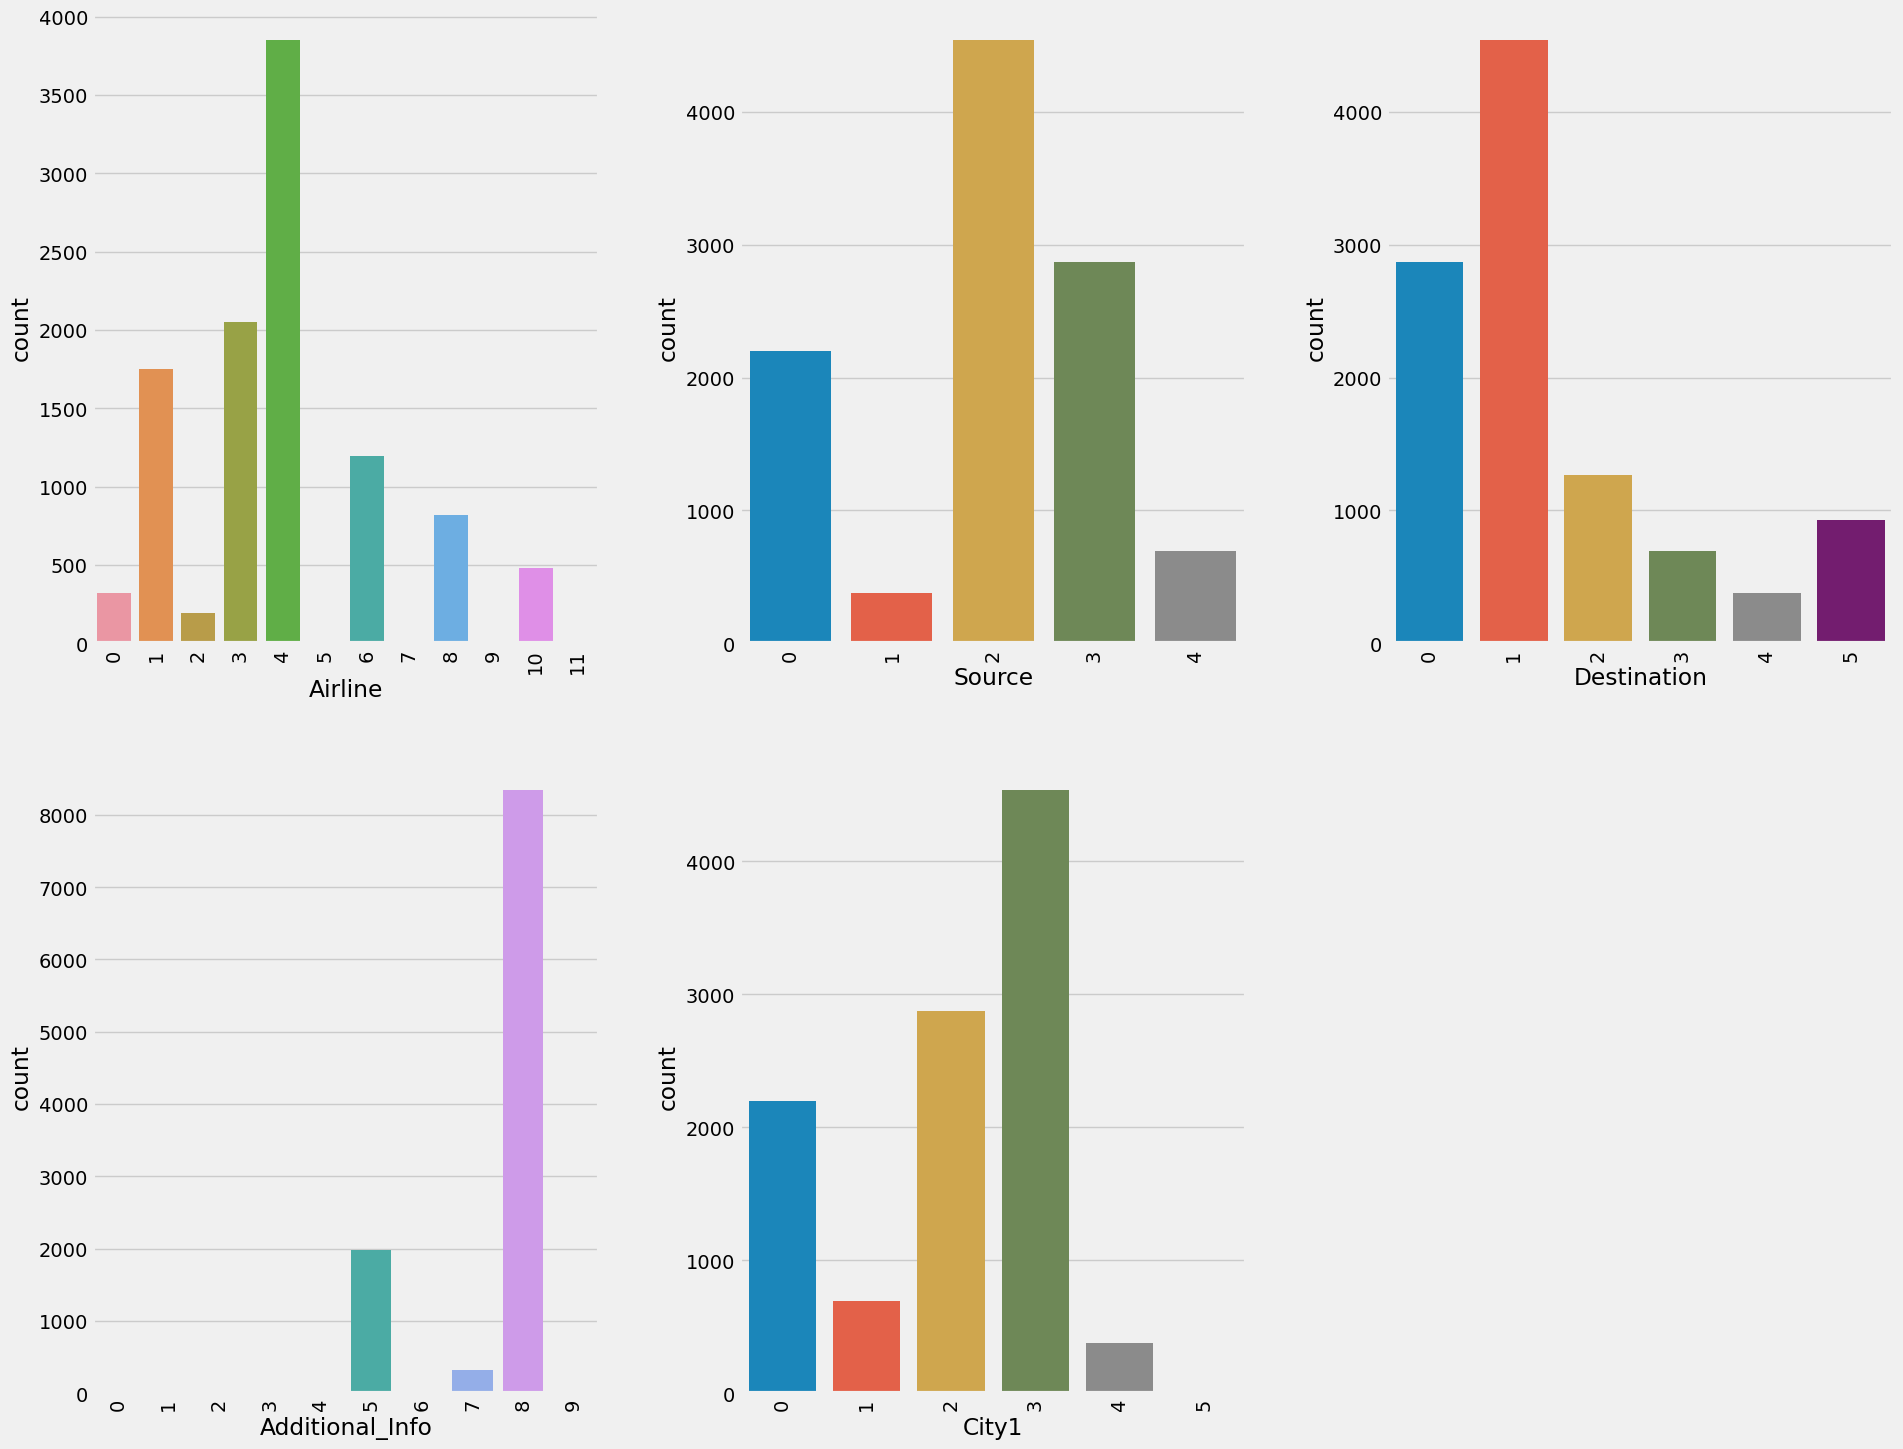

In [87]:
import seaborn as sns
c=1
plt.figure(figsize=(20,45))

for i in categorical:
    plt.subplot(6,3,c)
    sns.countplot(data[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1
    
plt.show()

In [88]:
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Density'>

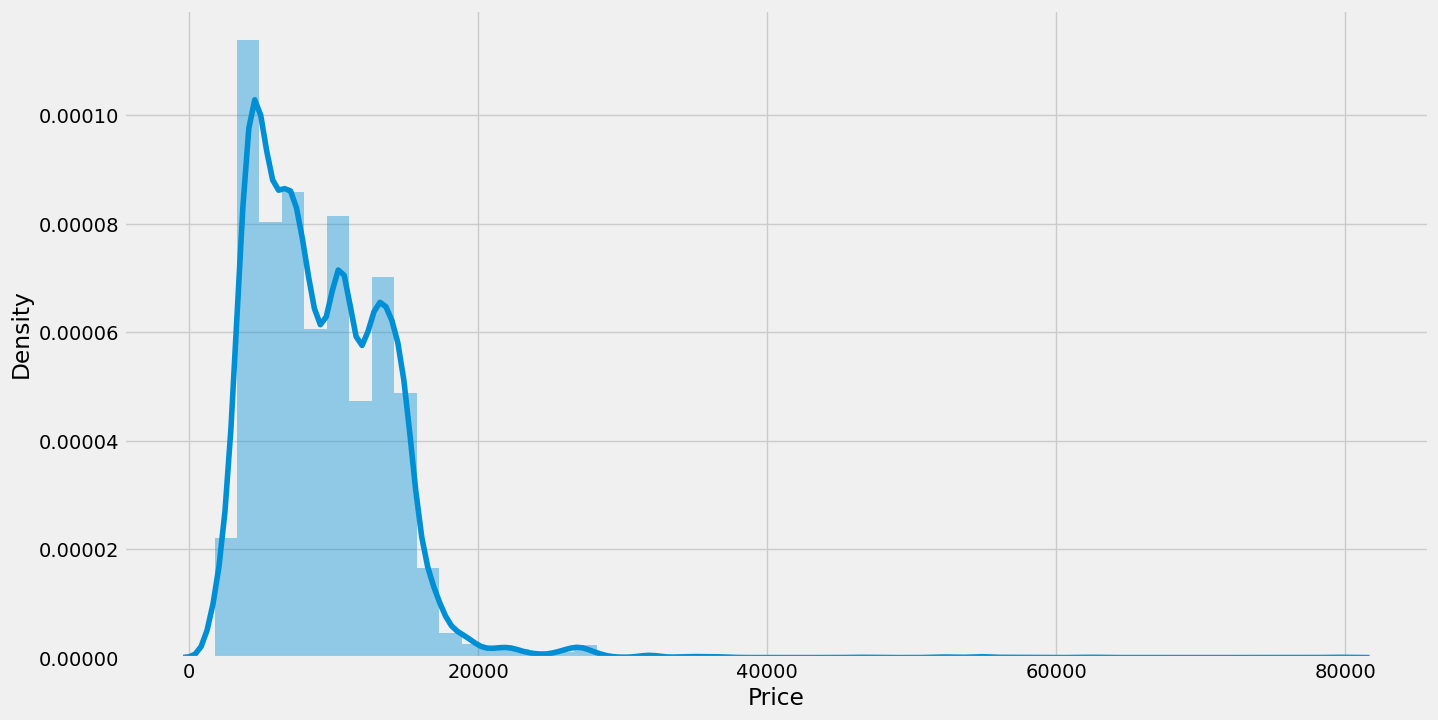

In [89]:
plt.figure(figsize=(15,8))
sns.distplot(data.Price)

<AxesSubplot:>

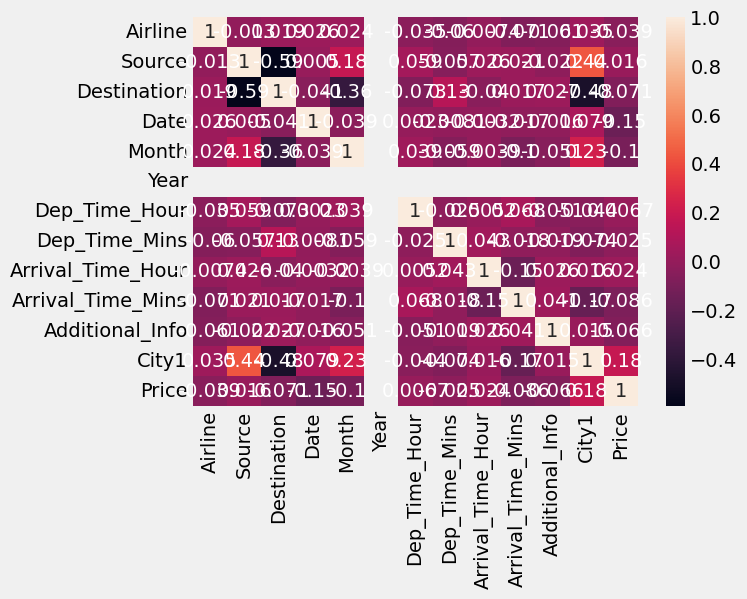

In [90]:
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='Price'>

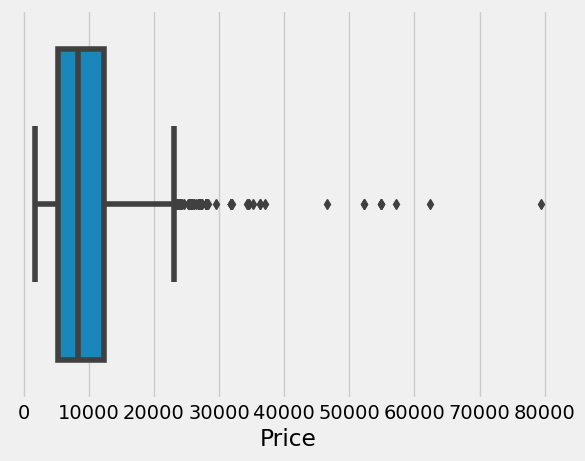

In [91]:
import seaborn as sns
sns.boxplot(data['Price'])

In [92]:
y=data['Price']
x=data.drop(columns=['Price'],axis=1)

In [93]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x = pd.get_dummies(x, columns=['Arrival_Time_Date'])

In [94]:
x_scaled=ss.fit_transform(x)

In [95]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_Time_Hour,Arrival_Time_Mins,...,Arrival_Time_Date_25-06-2019,Arrival_Time_Date_26-05-2019,Arrival_Time_Date_26-06-2019,Arrival_Time_Date_28-03-2019,Arrival_Time_Date_28-04-2019,Arrival_Time_Date_28-05-2019,Arrival_Time_Date_28-06-2019,Arrival_Time_Date_29-03-2019,Arrival_Time_Date_29-05-2019,Arrival_Time_Date_29-06-2019
0,-0.410805,-1.658435,2.416778,1.237288,-1.467707,0.0,1.654268,-0.234932,-1.800319,-0.889984,...,-0.117307,-0.013685,-0.016761,-0.109254,-0.034907,-0.119341,-0.11524,-0.013685,-0.019355,-0.02164
1,-1.261152,0.890299,-0.973732,-1.475307,0.250153,0.0,-1.303000,1.363674,-0.050813,-0.587017,...,-0.117307,-0.013685,-0.016761,-0.109254,-0.034907,-0.119341,-0.11524,-0.013685,-0.019355,-0.02164
2,0.014369,0.040721,-0.295630,-0.531796,1.109082,0.0,-0.607172,0.031502,-1.362943,0.018918,...,-0.117307,-0.013685,-0.016761,-0.109254,-0.034907,-0.119341,-0.11524,-0.013685,-0.019355,-0.02164
3,-0.410805,0.890299,-0.973732,-0.177979,0.250153,0.0,0.958440,-1.034235,1.407109,0.321885,...,-0.117307,-0.013685,-0.016761,-0.109254,-0.034907,-0.119341,-0.11524,-0.013685,-0.019355,-0.02164
4,-0.410805,-1.658435,2.416778,-1.475307,-1.467707,0.0,0.610527,1.363674,1.115525,0.624852,...,-0.117307,-0.013685,-0.016761,-0.109254,-0.034907,-0.119341,-0.11524,-0.013685,-0.019355,-0.02164


In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [97]:
x_train.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_Time_Hour,Arrival_Time_Mins,...,Arrival_Time_Date_25-06-2019,Arrival_Time_Date_26-05-2019,Arrival_Time_Date_26-06-2019,Arrival_Time_Date_28-03-2019,Arrival_Time_Date_28-04-2019,Arrival_Time_Date_28-05-2019,Arrival_Time_Date_28-06-2019,Arrival_Time_Date_29-03-2019,Arrival_Time_Date_29-05-2019,Arrival_Time_Date_29-06-2019
10005,6,2,1,27,5,2019,8,30,19,15,...,0,0,0,0,0,0,0,0,0,0
3684,4,2,1,9,5,2019,11,30,12,35,...,0,0,0,0,0,0,0,0,0,0
1034,8,2,1,24,4,2019,15,45,22,5,...,0,0,0,0,0,0,0,0,0,0
3909,6,2,1,21,3,2019,12,50,1,35,...,0,0,0,0,0,0,0,0,0,0
3088,1,2,1,24,6,2019,17,15,19,15,...,1,0,0,0,0,0,0,0,0,0


In [98]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
rfr=RandomForestRegressor()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()

In [99]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

for i in [rfr,gb,ad]:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    test_score=r2_score(y_test,y_pred)
    train_score=r2_score(y_train, i.predict(x_train))
    if abs(train_score-test_score)<=0.2:
        print(i)
        print("R2 Score is", r2_score(y_test, y_pred))
        print("R2 Score for train data", r2_score(y_train, i.predict(x_train)))
        print("Mean absolute error is", mean_absolute_error(y_pred, y_test))
        print("Mean squared error is", mean_squared_error(y_pred, y_test))
        print("Root Mean Squared Error is", (mean_squared_error(y_pred,y_test)))

RandomForestRegressor()
R2 Score is 0.9210407650578942
R2 Score for train data 0.9788169622671348
Mean absolute error is 645.0066384135155
Mean squared error is 1669120.9993615397
Root Mean Squared Error is 1669120.9993615397
GradientBoostingRegressor()
R2 Score is 0.8053173894413093
R2 Score for train data 0.7831980660583012
Mean absolute error is 1440.8316206916986
Mean squared error is 4115399.97483883
Root Mean Squared Error is 4115399.97483883
AdaBoostRegressor()
R2 Score is 0.27059999028268966
R2 Score for train data 0.24878512625341165
Mean absolute error is 3291.085287454723
Mean squared error is 15418802.804337373
Root Mean Squared Error is 15418802.804337373


In [100]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
    
knn=KNeighborsRegressor()
svr=SVR()
dt=DecisionTreeRegressor()

for i in[knn, svr, dt]:
    i.fit(x_train, y_train)
    y_pred=i.predict(x_test)
    test_score=r2_score(y_test, y_pred)
    train_score=r2_score(y_train, i. predict(x_train))
    if abs(train_score-test_score)<=0.1:
        print(i)
        print("R2 Score is", r2_score(y_test, y_pred))
        print("R2 Score for train data", r2_score(y_train, i.predict(x_train)))
        print("Mean absolute error is", mean_absolute_error(y_test, y_pred))
        print("Mean squared error is", mean_squared_error(y_test, y_pred))
        print("Root Mean Squared Error is", (mean_squared_error(y_test, y_pred, squared=False)))

KNeighborsRegressor()
R2 Score is 0.6431673709717799
R2 Score for train data 0.7431388164748247
Mean absolute error is 1816.75114646701
Mean squared error is 7543092.771923258
Root Mean Squared Error is 2746.469146362882
SVR()
R2 Score is -0.03011958436164175
R2 Score for train data -0.023062696462249344
Mean absolute error is 3629.612878180137
Mean squared error is 21775720.488835614
Root Mean Squared Error is 4666.446237645476


In [ ]:
from sklearn. model_selection import cross_val_score
for i in range(2,5):
    cv=cross_val_score(rfr, x, y, cv=i)
    print(rfr, cv.mean())

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid={'n_estimators':[10,30,50,70,100],'max_depth':[None, 1,2,3],'max_features':['auto','sqrt']}
rfr=RandomForestRegressor()
rf_res=RandomizedSearchCV(estimator=rfr, param_distributions=param_grid, cv=3,verbose=2,n_jobs=-1)
rf_res. fit(x_train, y_train)

In [ ]:
gb=GradientBoostingRegressor()
gb_res=RandomizedSearchCV(estimator=gb, param_distributions=param_grid, cv=3,verbose=2,n_jobs=-1)
gb_res. fit(x_train, y_train)

In [ ]:
rfr=RandomForestRegressor(n_estimators=10,max_features='sqrt', max_depth=None)
rfr.fit(x_train, y_train)
y_train_pred=rfr. predict(x_train)
y_test_pred=rfr. predict(x_test)
print("train accuracy", r2_score(y_train_pred, y_train))
print("test accuracy", r2_score(y_test_pred, y_test))

In [ ]:
knn=KNeighborsRegressor(n_neighbors=2,algorithm='auto', metric_params=None, n_jobs=-1)
knn. fit(x_train, y_train)
y_train_pred=knn.predict(x_train)
y_test_pred=knn.predict(x_test)
print("train accuracy", r2_score(y_train_pred, y_train))
print("test accuracy", r2_score(y_test_pred, y_test))

In [ ]:
rfr=RandomForestRegressor(n_estimators=10,max_features='sqrt', max_depth=None)
rfr.fit(x_train, y_train)
y_train_pred=rfr. predict(x_train)
y_test_pred=rfr. predict(x_test)
print("train accuracy", r2_score(y_train_pred, y_train))
print("test accuracy", r2_score(y_test_pred, y_test))

In [ ]:
Price = rfr.predict(x_test)
price_list=pd.DataFrame({'Price':Price})

In [ ]:
price_list

In [ ]:
import pickle
pickle.dump(rfr,open('C:/Users/lenovo/Flight Price Prediction Using ML/Training File/model1.pkl','wb'))

In [ ]:
from flask import Flask, render_template, request
from flask_cors import cross_origin
import numpy as np
import pickle
import sklearn
import pandas as pd

In [ ]:
model=pickle.load(open(r"C:/Users/lenovo/Flight Price Prediction Using ML/Training File/model1.pkl", "rb"))

In [ ]:
from flask import Flask, render_template
app = Flask(__name__)
@app.route("/home")
@cross_origin()
def home():
       return render_template('C:/Users/lenovo/Flight Price Prediction Using ML/Flask/templates/home.html')

In [ ]:
@app.route("/predict")
def home1():
    return render_template('predict.html')


@app.route("/pred", methods=['POST','GET'])
def predict():
    x = [[int(x) for x in request.form.values()]]
    print(x)

    x = np.array(x)
    print(x.shape, x)

    model = pickle.load(open('C:/Users/lenovo/Flight Price Prediction Using ML/Training File/model1.pkl', 'rb'))
    pred = model.predict(x)
    print(pred)

    return render_template('submit.html', prediction_text=pred)

In [ ]:
if __name__=="__main__":
     app.run(debug=False)